## EDA on Titanic

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset

titanic = pd.read_csv(r'D:\Study Notes\Projects\Python\Titanic_dataset\train.csv')

In [3]:
titanic.shape

(891, 12)

In [4]:
# Top 5 rows

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Bottom 5 rows

titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Categorical Columns

#### Survied
#### Pclass
#### Sex
#### Parch
#### Embarked

### Numerical Columns

#### Age
#### Fare
#### PassengerID

### Mided Columns

#### Name
#### Ticket
#### Cabin

In [6]:
# checking the info for all columns

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Few conclusion

# Missing values in age, cabin and embarked columns
# more than 70 percent values are missing in the columns will have to drop
# few columns have inappropriate data types

In [9]:
# droping cabin column

titanic.drop(columns=['Cabin'], inplace=True)

In [10]:
# Imputing missing values for age
# Strategy = Mean

titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [11]:
# Imputing missing values for embarked 

# finding the most appeared values in embarked columns

titanic['Embarked'].value_counts()

# S it is 

titanic['Embarked'].fillna('S', inplace=True)

In [12]:
# Caculation of numrtic columns

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
# Changing the data types for the following cols

# surived(category)
# Pclass(category)
# sex(category)
# age(int)
# embarked(category)

titanic['Survived']=titanic['Survived'].astype('category')
titanic['Pclass']=titanic['Pclass'].astype('category')
titanic['Sex']=titanic['Sex'].astype('category')
titanic['Embarked']=titanic['Embarked'].astype('category')
titanic['Age']=titanic['Age'].astype('int')

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [16]:
titanic.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
#per_missing = titanic.isnull().sum() * 100 / len(titanic)
#per_missing

In [18]:
# Univariate Analysis

# checking the distribution in the train

titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
((titanic['Pclass'].value_counts()/891)*100)

# Conclusion : Pclass was the most crowdes class

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

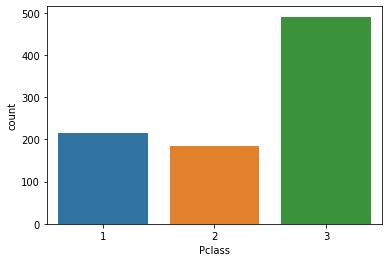

In [20]:
sns.countplot(x=titanic['Pclass']);

Out of 891 62 % people died in the accident


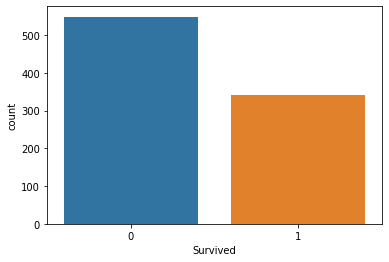

In [21]:
# checking how many survied and died
# 0 - Not Surived
# 1  Survived


sns.countplot(x=titanic['Survived']);

death_percent = round((titanic['Survived'].value_counts().values[0]/891)*100)
print("Out of 891 {} % people died in the accident".format(death_percent))

In [22]:
titanic['Survived'].value_counts().keys()

CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category')

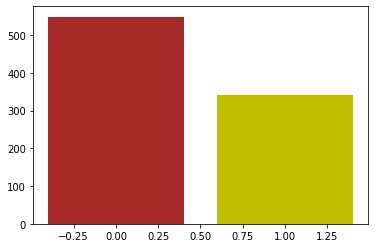

In [23]:
plt.bar(titanic['Survived'].value_counts().keys(),titanic['Survived'].value_counts(), color=['brown','y']);
#plt.legend(["Male","Female"])

In [24]:
# checking the distribution as per gender in the train

titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

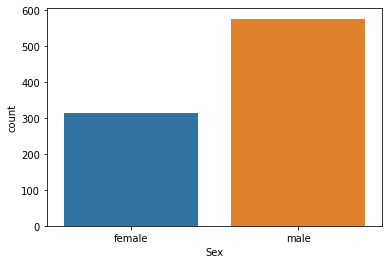

In [25]:
sns.countplot(x=titanic['Sex']);

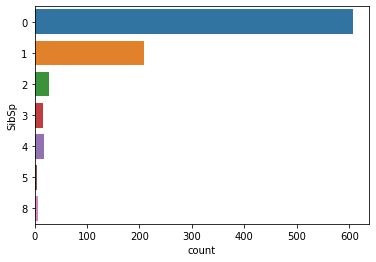

In [26]:
titanic['SibSp'].value_counts()

sns.countplot(y=titanic['SibSp']);

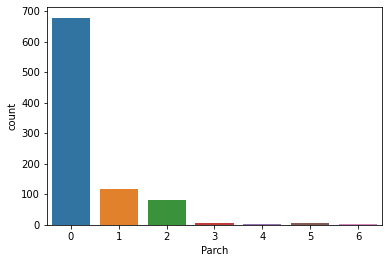

In [27]:
titanic['Parch'].value_counts()

sns.countplot(x=titanic['Parch']);

#plt.plot(titanic['Parch'].value_counts())

In [28]:
((titanic['Embarked'].value_counts()/891)*100)

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

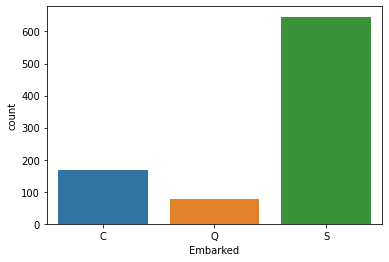

In [29]:
sns.countplot(x=titanic['Embarked']);

In [30]:
# checking the average age of passenger by gender

titanic.groupby('Sex').Age.mean()

Sex
female    28.089172
male      30.336222
Name: Age, dtype: float64

In [31]:
# checking the average age of passenger who survied and died

titanic.groupby('Survived').Age.mean()

Survived
0    30.240437
1    28.426901
Name: Age, dtype: float64

In [32]:
# checking the average age of passenger per train class


titanic.groupby('Pclass').Age.mean()

Pclass
1    36.944444
2    29.804348
3    26.191446
Name: Age, dtype: float64

In [33]:
titanic[titanic['Sex'] =='male'].Pclass.value_counts()

#titanic['Pclass'].value_counts() 

3    347
1    122
2    108
Name: Pclass, dtype: int64

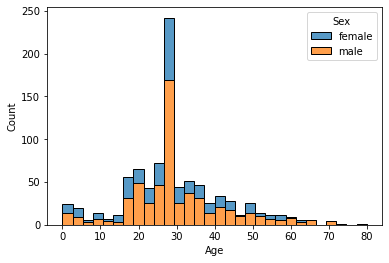

In [34]:
#plt.figure(figsize=())

sns.histplot(data=titanic, x=titanic['Age'], hue="Sex", multiple='stack');

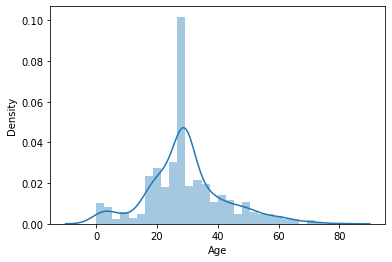

In [64]:
# Age column

sns.distplot(titanic['Age']);

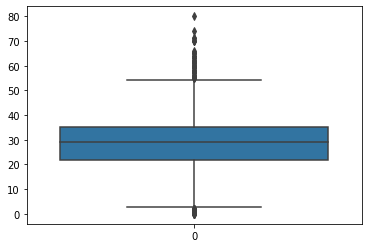

In [36]:
sns.boxplot(data=titanic['Age']);

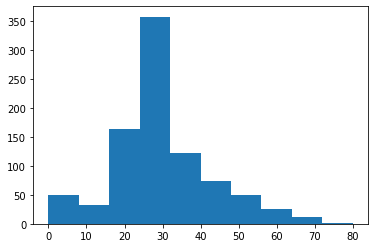

In [37]:
plt.hist(titanic['Age']);

In [38]:
titanic['Age'].mean()

29.544332210998878

In [39]:
Age_60 = titanic[(titanic['Age']>60) & (titanic['Age']<70)].shape[0]
Age_70 = titanic[(titanic['Age']>=70) & (titanic['Age']<=75)].shape[0]
Age_80 = titanic[titanic['Age']>75].shape[0]

print("People with age in between 60 and 70 are {}".format(Age_60))
print("People with age in between 70 and 75 are {}".format(Age_70))
print("People with age greater then 75 are {}".format(Age_80))

print('-'*50)

print('People with age between 0 and 1 are {}'.format(titanic[titanic['Age']<1].shape[0]))


People with age in between 60 and 70 are 15
People with age in between 70 and 75 are 6
People with age greater then 75 are 1
--------------------------------------------------
People with age between 0 and 1 are 7


In [40]:
# For all pratical purpose age can be considered as normal distribution
# Deeper analysis is required for outlier detetion

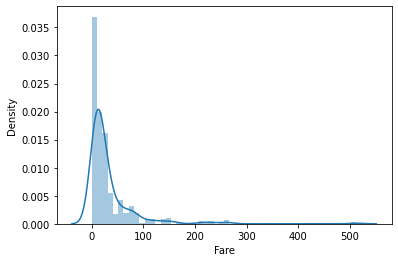

In [65]:
# Fare column

sns.distplot(titanic['Fare']);

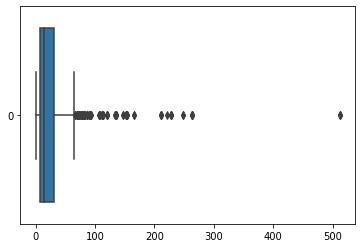

In [42]:
sns.boxplot(data=titanic['Fare'], orient="h");

In [43]:
fare_200 = titanic[(titanic['Fare']>200) & (titanic['Fare']<300)].shape[0]
fare_300 = titanic[titanic['Fare']>300].shape[0]

print(fare_200)
print(fare_300)

17
3


In [44]:
titanic.SibSp.sum()

466

In [45]:
titanic[titanic['SibSp'] > 2]['SibSp'].sort_values(ascending=False)

863    8
324    8
846    8
201    8
792    8
180    8
159    8
59     5
386    5
71     5
480    5
683    5
541    4
686    4
542    4
266    4
787    4
813    4
824    4
850    4
16     4
278    4
261    4
50     4
182    4
68     4
171    4
164    4
233    4
119    4
726    3
24     3
27     3
819    3
63     3
85     3
642    3
88     3
634    3
485    3
176    3
409    3
374    3
341    3
229    3
7      3
Name: SibSp, dtype: int64

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


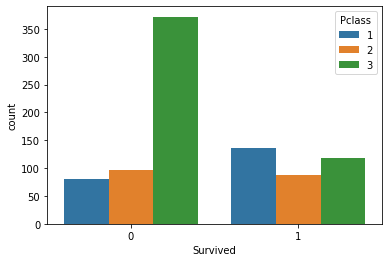

In [48]:
#sns.barplot(x='Pclass', y='Survived', data=titanic);

sns.countplot(x=titanic['Survived'], hue=titanic['Pclass']);

pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


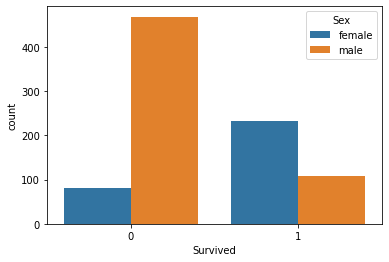

In [49]:
sns.countplot(x=titanic['Survived'], hue=titanic['Sex']);

pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


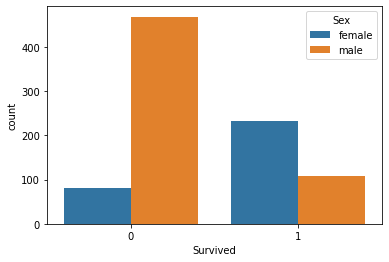

In [50]:
# who has better chance of survival male or female

sns.countplot(x=titanic['Survived'], hue=titanic['Sex']);

pd.crosstab(titanic['Sex'],titanic['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


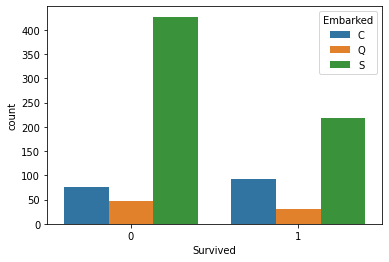

In [51]:
sns.countplot(x=titanic['Survived'], hue=titanic['Embarked']);

pd.crosstab(titanic['Embarked'],titanic['Survived'])

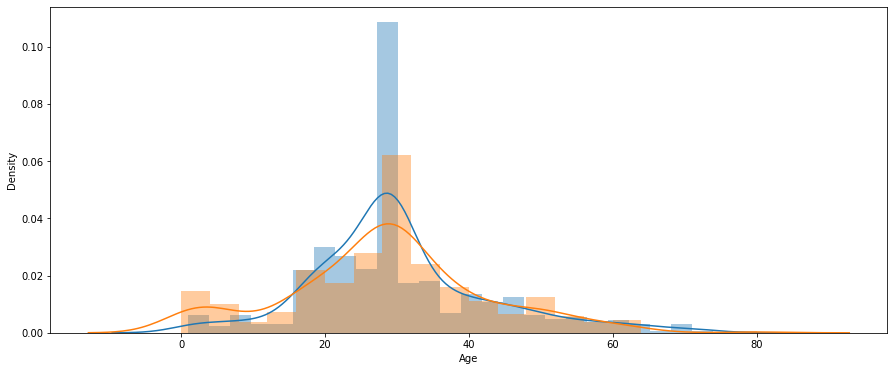

In [53]:
# Survived with age

plt.figure(figsize=(15,6))
sns.distplot(titanic[titanic['Survived']==0]['Age']);
sns.distplot(titanic[titanic['Survived']==1]['Age']);

In [54]:
# some feature engineering

titanic['family_size']= titanic['SibSp'] + titanic['Parch']

In [55]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,1,0


In [56]:
titanic['fare_per_person'] = (titanic['Fare']) / (titanic['family_size'] + 1)

In [57]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,family_size,fare_per_person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,0,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,0,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,1,0,8.05000


In [58]:
# Now we will make new columns family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [59]:
titanic['family_type']=titanic['family_size'].apply(family_type)

In [60]:
# Dropping Sibsp, Parch and family_size

titanic.drop(columns=['SibSp','Parch','family_size'], inplace=True)

In [61]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Gender,fare_per_person,family_type
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,PC 17572,76.7292,C,0,38.3646,Medium
844,845,0,3,"Culumovic, Mr. Jeso",male,17,315090,8.6625,S,1,8.6625,Alone
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22,113505,55.0000,S,0,27.5000,Medium
384,385,0,3,"Plotcharsky, Mr. Vasil",male,29,349227,7.8958,S,1,7.8958,Alone
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,29,372622,7.7500,Q,1,7.7500,Alone


In [62]:
pd.crosstab(titanic['family_type'], titanic['Survived'])

Survived,0,1
family_type,,
Alone,374,163
Large,40,7
Medium,135,172


In [66]:
# Categorical columns encoding


titanic['Gender'] = titanic['Sex'].map({'male':1, 'female':0})

In [67]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Gender,fare_per_person,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,1,3.62500,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C,0,35.64165,Medium


In [72]:
# column to be transformed are pclass, embarked, family_type

pd.get_dummies(data=titanic, columns=['Pclass','Embarked', 'family_type'],drop_first=True)

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Gender,fare_per_person,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,1,3.62500,0,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,0,35.64165,0,0,0,0,0,1
2,3,1,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,0,7.92500,0,1,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,0,26.55000,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",male,35,373450,8.0500,1,8.05000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27,211536,13.0000,1,13.00000,1,0,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",female,19,112053,30.0000,0,30.00000,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,W./C. 6607,23.4500,0,5.86250,0,1,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",male,26,111369,30.0000,1,30.00000,0,0,0,0,0,0


In [74]:
titanic.drop(columns=['Sex'], inplace=True)

In [75]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Embarked,Gender,fare_per_person,family_type
0,1,0,3,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,S,1,3.62500,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,PC 17599,71.2833,C,0,35.64165,Medium
2,3,1,3,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,S,0,7.92500,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,S,0,26.55000,Medium
4,5,0,3,"Allen, Mr. William Henry",35,373450,8.0500,S,1,8.05000,Alone


In [77]:
df=pd.get_dummies(data=titanic, columns=['Pclass','Embarked', 'family_type'],drop_first=True)
df.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,Gender,fare_per_person,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,1,3.62500,0,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,PC 17599,71.2833,0,35.64165,0,0,0,0,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,7.92500,0,1,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,26.55000,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,1,8.05000,0,1,0,1,0,0


<AxesSubplot:>

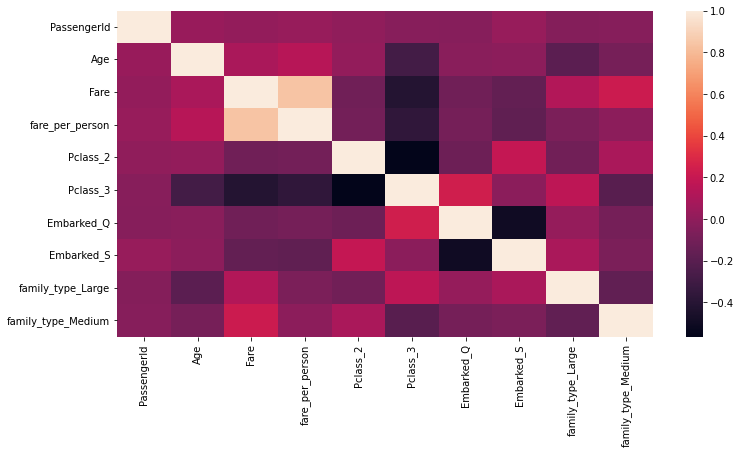

In [82]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

### Drawing conclusion

##### Chance og female survival is higher than male survival
##### Travelling n Pclass 3 was deadliest
##### Somehow people going to C survived more
##### People in the age range of 20 to 40 had a higher chance to not surviving
##### People traveling with smaller families had a higher chance of surviving the accident in comparision to people with large families and traveling alone